### Final
By Michael Pogue

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

fmt = '{:<13} {:}'
DIRECTORY = os.getcwd()

for root, dirs, files in os.walk(DIRECTORY):
    for file in files:
        if file.endswith(".csv"):
            csv = file

df = pd.read_csv(csv)
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


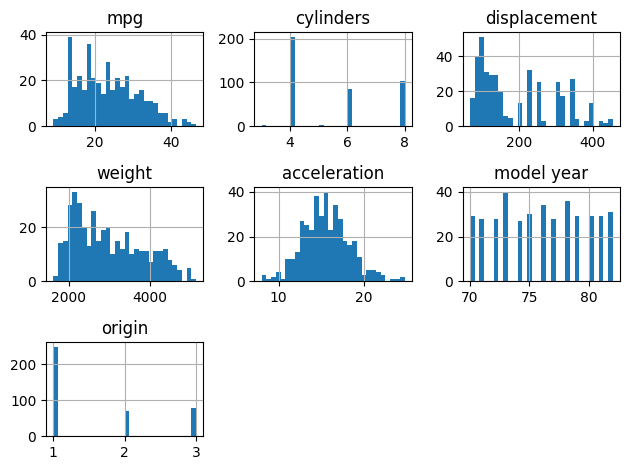

In [27]:
df.hist(bins = 30)
plt.tight_layout()

In [34]:
print(df.head(n = 10))
print(df.describe())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   
5  15.0          8         429.0        198    4341          10.0          70   
6  14.0          8         454.0        220    4354           9.0          70   
7  14.0          8         440.0        215    4312           8.5          70   
8  14.0          8         455.0        225    4425          10.0          70   
9  15.0          8         390.0        190    3850           8.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skyla

In [33]:
df.corr()

C:\Users\mrpog\AppData\Local\Temp\ipykernel_26132\3683255628.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


### Values

In [28]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 123)

X = train_set[['weight', 'model year']]
y = train_set['mpg']

X_test = test_set[['weight', 'model year']]
y_test = test_set['mpg']

### Linear Regression

In [29]:
lr_model = LinearRegression()
lr_model.fit(X,y)

fmt = '{:<13} {:}'
y_pred = lr_model.predict(X)
print('Results for linear regression on training data:')
print('\nInternal parameters:')
print(fmt.format('Bias:', round(lr_model.intercept_,2)))
print(fmt.format('Coefficients:', lr_model.coef_))

print('\nResults for pipeline linear regression on training data:')
print(fmt.format('MAE:', round(mean_absolute_error(y, y_pred), 2)))
print(fmt.format('RMSE:', round(np.sqrt(mean_squared_error(y, y_pred)),2)))
print(fmt.format('MSE:', round(mean_squared_error(y, y_pred), 2)))
print(fmt.format('R^2:', round((r2_score(y,y_pred)*100), 2)))

y_test_pred = lr_model.predict(X_test)
print('\nResults for pipeline linear regression on test data:')
print(fmt.format('MAE:', round(mean_absolute_error(y_test, y_test_pred), 2)))
print(fmt.format('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2)))
print(fmt.format('MSE:', round(mean_squared_error(y_test, y_test_pred), 2)))
print(fmt.format('R^2:', round((r2_score(y_test,y_test_pred)*100), 2)))


Results for linear regression on training data:

Internal parameters:
Bias:         -14.06
Coefficients: [-0.00659201  0.75235456]

Results for pipeline linear regression on training data:
MAE:          2.62
RMSE:         3.44
MSE:          11.82
R^2:          80.79

Results for pipeline linear regression on test data:
MAE:          2.61
RMSE:         3.36
MSE:          11.27
R^2:          80.67


### Pipelined Linear Regression

In [30]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
scale = StandardScaler()
lr_model = LinearRegression()

stages = [
    ('imp_mean', imp_mean),
    ('scale', scale),
    ('lr_model', lr_model),
    ]

pipe_model = Pipeline(stages)
pipe_model.fit(X,y)

y_pred = pipe_model.predict(X)
print('Results for pipeline polynomial linear regression on training data')
print(fmt.format('MAE:', round(mean_absolute_error(y, y_pred), 2)))
print(fmt.format('RMSE:', round(np.sqrt(mean_squared_error(y, y_pred)),2)))
print(fmt.format('MSE:', round(mean_squared_error(y, y_pred), 2)))
print(fmt.format('R^2:', round((r2_score(y,y_pred)*100), 2)))

y_test_pred = pipe_model.predict(X_test)
print('\nResults for pipeline polynomiallinear regression on test data')
print(fmt.format('MAE:', round(mean_absolute_error(y_test, y_test_pred), 2)))
print(fmt.format('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2)))
print(fmt.format('MSE:', round(mean_squared_error(y_test, y_test_pred), 2)))
print(fmt.format('R^2:', round((r2_score(y_test,y_test_pred)*100), 2)))

Results for pipeline polynomial linear regression on training data
MAE:          2.62
RMSE:         3.44
MSE:          11.82
R^2:          80.79

Results for pipeline polynomiallinear regression on test data
MAE:          2.61
RMSE:         3.36
MSE:          11.27
R^2:          80.67


### Pipelined Polynomial Regression

In [31]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
poly4 = PolynomialFeatures(degree = 3, include_bias = False)
scale = StandardScaler()
lr_model = LinearRegression()

stages = [
    ('imp_mean', imp_mean),
    ('poly4', poly4),
    ('scale', scale),
    ('lr_model', lr_model),
    ]

pipe_model = Pipeline(stages)
pipe_model.fit(X,y)

y_pred = pipe_model.predict(X)
print('Results for pipeline polynomial linear regression on training data')
print(fmt.format('MAE:', round(mean_absolute_error(y, y_pred), 2)))
print(fmt.format('RMSE:', round(np.sqrt(mean_squared_error(y, y_pred)),2)))
print(fmt.format('MSE:', round(mean_squared_error(y, y_pred), 2)))
print(fmt.format('R^2:', round((r2_score(y,y_pred)*100), 2)))

y_test_pred = pipe_model.predict(X_test)
print('\nResults for pipeline polynomiallinear regression on test data')
print(fmt.format('MAE:', round(mean_absolute_error(y_test, y_test_pred), 2)))
print(fmt.format('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2)))
print(fmt.format('MSE:', round(mean_squared_error(y_test, y_test_pred), 2)))
print(fmt.format('R^2:', round((r2_score(y_test,y_test_pred)*100), 2)))

Results for pipeline polynomial linear regression on training data
MAE:          2.01
RMSE:         2.82
MSE:          7.95
R^2:          87.09

Results for pipeline polynomiallinear regression on test data
MAE:          2.08
RMSE:         2.92
MSE:          8.51
R^2:          85.41


# Results
Basic results for our regression models to predict weight on the Howell data.

| Model | Training Features | RMSE train | R2 train | RMSE test | R2 test |
|:---|:---|:---|:---|:---|:---|
|Linear Regression|Weight & Model Year|3.44|80.79|3.36|80.67|
|Linear Regression Pipe|Weight & Model Year|3.44|80.79|3.36|80.67|
|Poly Regression Pipe|Weight & Model Year|2.82|87.09|2.92|85.41|

In [35]:
model_year = df['model year']
weight = df['weight']
mpg = df['mpg']